# Basic Nueral Network

In [35]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

## Generate Some Random Data

Let's make sure they have the sin(x) shape.

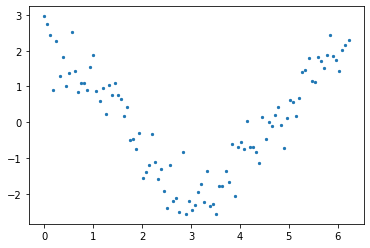

In [97]:
torch.manual_seed(42)
X = torch.arange(0, 1, 0.01) * torch.pi * 2
Y = torch.cos(X) * 2 + torch.randn_like(X) * 0.5

plt.scatter(X, Y, s=5)

In [98]:
from turtle import forward

class WideNet(nn.Module):
    def __init__(self, n_hidden=512) -> None:
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(1, n_hidden),
            nn.Tanh(),
            nn.Linear(n_hidden, 1)
        )

    def forward(self, inputs):
        return self.layers(inputs)

  0%|          | 0/100 [00:00<?, ?it/s]

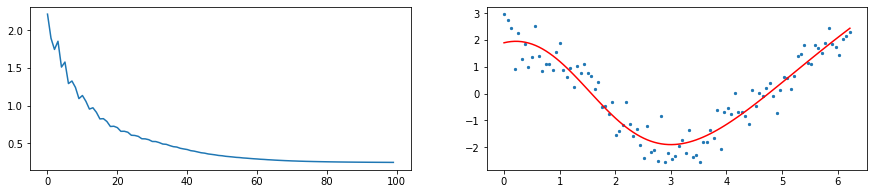

In [104]:

model = WideNet()
calc_loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.00001)
losses = []
yhat = []

for i in tqdm(range(100)):
    optimizer.zero_grad()
    yhat = model(X.reshape(-1, 1)).reshape(-1)
    
    loss = calc_loss(Y, yhat)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
ax[0].plot(losses)
ax[1].scatter(X, Y, s=5)
ax[1].plot(X, yhat.detach().cpu().reshape(-1), c="red")